In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("../../"))
from pydistsim import NetworkGenerator
from pydistsim import *

In [2]:
from pydistsim.logger import enable_logger, set_log_level

enable_logger()
set_log_level("DEBUG")

In [3]:
net_gen = NetworkGenerator(10, 5, 15, degree=3)
net = net_gen.generate_random_network()

2024-05-20 21:04:53.630 | WARNING  | pydistsim.networkgenerator:__init__:69 - Generation could be slow for large degree parameter with bounded n_max.
2024-05-20 21:04:53.633 | INFO     | pydistsim.network:reset:349 - Resetting network.
2024-05-20 21:04:53.634 | INFO     | pydistsim.network:reset_all_nodes:473 - Resetting all nodes.
2024-05-20 21:04:53.635 | INFO     | pydistsim.network:__init__:73 - Instance of Network has been initialized.
2024-05-20 21:04:53.635 | DEBUG    | pydistsim.environment:find_random_pos:214 - Random position found in 0 iterations.
2024-05-20 21:04:53.636 | DEBUG    | pydistsim.network:add_node:243 - Node 1 is placed on position [378.96419759 413.92169157].
2024-05-20 21:04:53.637 | DEBUG    | pydistsim.environment:find_random_pos:214 - Random position found in 0 iterations.
2024-05-20 21:04:53.637 | DEBUG    | pydistsim.network:add_node:243 - Node 2 is placed on position [406.11194938 514.29337936].
2024-05-20 21:04:53.638 | DEBUG    | pydistsim.environment:

/home/agus/.pymote_venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/mnt/d/Proyectos/pymote/pydistsim/network.py:355: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


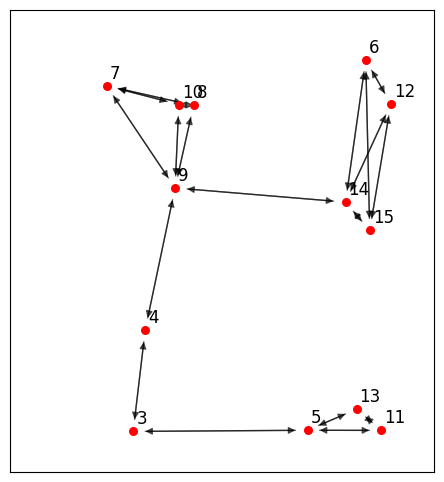

In [4]:
net.show()

In [5]:
from pydistsim.algorithms.broadcast import Flood

# Asigna el algoritmo
net.algorithms = ((Flood, {"informationKey": "I"}),)

# Asigna el mensaje a enviar, la información inicial
some_node = net.nodes_sorted()[0]
some_node.memory["I"] = "Hello distributed world"

2024-05-20 21:04:54.602 | INFO     | pydistsim.network:reset:349 - Resetting network.
2024-05-20 21:04:54.603 | INFO     | pydistsim.network:reset_all_nodes:473 - Resetting all nodes.
2024-05-20 21:04:54.604 | DEBUG    | pydistsim.algorithm:__init__:122 - Instance of Flood class has been initialized.


In [6]:
from pydistsim.npickle import write_npickle, read_npickle

# Escribir la red + algoritmo en un archivo
write_npickle(net, "mreza1.tar.gz")
net_from_file = read_npickle("mreza1.tar.gz")
net_from_file

2024-05-20 21:04:54.620 | INFO     | pydistsim.npickle:write_pickle:54 - instance of <class 'pydistsim.network.Network'> saved in mreza1.tar.gz
2024-05-20 21:04:54.628 | INFO     | pydistsim.npickle:read_pickle:75 - instance of <class 'pydistsim.network.Network'> loaded: mreza1.tar.gz


In [7]:
# Correr la simulación
%run ../../pydistsim/gui/simulationgui.py

In [8]:
sim = Simulation(net)

2024-05-20 21:04:54.845 | DEBUG    | pydistsim.simulation:__init__:28 - Simulation 0x7f7e8b940600 created successfully.


In [9]:
sim.run(1)

2024-05-20 21:04:54.855 | DEBUG    | pydistsim.network:send:551 - Sending message from None to <Node id=3>.
2024-05-20 21:04:54.857 | DEBUG    | pydistsim.simulation:run_algorithm:113 - [Flood] Step 1 finished


In [10]:
sim.run(1)

2024-05-20 21:04:54.865 | DEBUG    | pydistsim.node:receive:104 - Node 3 received message 
------ Message 'INITIALIZATION_MESSAGE' ------ 
     source = None 
destination = <Node id=3> 
     header = '' 
id(message) = 0x7f7e8b941c90>
2024-05-20 21:04:54.866 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b941c90
2024-05-20 21:04:54.867 | DEBUG    | pydistsim.node:send:82 - Node 3 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=3> 
destination = Broadcasting 
     header = 'Information' 
id(message) = 0x7f7e8b942490>.
2024-05-20 21:04:54.868 | DEBUG    | pydistsim.simulation:run_algorithm:113 - [Flood] Step 2 finished


In [11]:
sim.run(1)

2024-05-20 21:04:54.876 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=3> to <Node id=4>.
2024-05-20 21:04:54.878 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=3> to <Node id=5>.
2024-05-20 21:04:54.878 | DEBUG    | pydistsim.simulation:run_algorithm:113 - [Flood] Step 3 finished


In [12]:
sim.run(1)

2024-05-20 21:04:54.887 | DEBUG    | pydistsim.node:receive:104 - Node 4 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=3> 
destination = <Node id=4> 
     header = 'Information' 
id(message) = 0x7f7e8e914450>
2024-05-20 21:04:54.888 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8e914450
2024-05-20 21:04:54.889 | DEBUG    | pydistsim.node:send:82 - Node 4 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destination = [<Node id=9>] 
     header = 'Information' 
id(message) = 0x7f7e8b941510>.
2024-05-20 21:04:54.890 | DEBUG    | pydistsim.node:receive:104 - Node 5 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=3> 
destination = <Node id=5> 
     header = 'Information' 
id(message) = 0x7f7e8b943a10>
2024-05-20 21:04:54.890 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b943a10
2024-05-20 21:04:54.891 | DEBUG    | pydist

In [13]:
sim.run(1)

2024-05-20 21:04:54.901 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=5> to <Node id=13>.
2024-05-20 21:04:54.903 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=5> to <Node id=11>.
2024-05-20 21:04:54.903 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=4> to <Node id=9>.
2024-05-20 21:04:54.904 | DEBUG    | pydistsim.simulation:run_algorithm:113 - [Flood] Step 5 finished


In [14]:
sim.run(1)

2024-05-20 21:04:54.913 | DEBUG    | pydistsim.node:receive:104 - Node 9 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=4> 
destination = <Node id=9> 
     header = 'Information' 
id(message) = 0x7f7e8b9414d0>
2024-05-20 21:04:54.914 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b9414d0
2024-05-20 21:04:54.915 | DEBUG    | pydistsim.node:send:82 - Node 9 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=9> 
destination = [<Node id=8>, <Node id=10>, <Node id=7>, <Node id=14>] 
     header = 'Information' 
id(message) = 0x7f7e8b94ac50>.
2024-05-20 21:04:54.916 | DEBUG    | pydistsim.node:send:82 - Node 9 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=9> 
destination = [<Node id=8>, <Node id=10>, <Node id=7>, <Node id=14>] 
     header = 'Information' 
id(message) = 0x7f7e8b94ac50>.
2024-05-20 21:04:54.916 | DEBUG    | pydistsim.node:send:82 - Node 9 sent message

In [15]:
sim.run(1)

2024-05-20 21:04:54.931 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=13> to <Node id=11>.
2024-05-20 21:04:54.933 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=11> to <Node id=13>.
2024-05-20 21:04:54.934 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=9> to <Node id=8>.
2024-05-20 21:04:54.935 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=9> to <Node id=10>.
2024-05-20 21:04:54.935 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=9> to <Node id=7>.
2024-05-20 21:04:54.936 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=9> to <Node id=14>.
2024-05-20 21:04:54.937 | DEBUG    | pydistsim.simulation:run_algorithm:113 - [Flood] Step 7 finished


In [16]:
sim.run(1)

2024-05-20 21:04:54.946 | DEBUG    | pydistsim.node:receive:104 - Node 7 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=9> 
destination = <Node id=7> 
     header = 'Information' 
id(message) = 0x7f7e8b93e250>
2024-05-20 21:04:54.947 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b93e250
2024-05-20 21:04:54.948 | DEBUG    | pydistsim.node:send:82 - Node 7 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=7> 
destination = [<Node id=10>, <Node id=8>] 
     header = 'Information' 
id(message) = 0x7f7e8b95ced0>.
2024-05-20 21:04:54.949 | DEBUG    | pydistsim.node:send:82 - Node 7 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=7> 
destination = [<Node id=10>, <Node id=8>] 
     header = 'Information' 
id(message) = 0x7f7e8b95ced0>.
2024-05-20 21:04:54.950 | DEBUG    | pydistsim.node:receive:104 - Node 8 received message 
------ Message 'NORMAL_MESSAGE' ------ 
    

In [17]:
sim.run(1)

2024-05-20 21:04:54.970 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=15>.
2024-05-20 21:04:54.972 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=12>.
2024-05-20 21:04:54.973 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=14> to <Node id=6>.
2024-05-20 21:04:54.973 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=10> to <Node id=8>.
2024-05-20 21:04:54.974 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=10> to <Node id=7>.
2024-05-20 21:04:54.975 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=8> to <Node id=10>.
2024-05-20 21:04:54.976 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=8> to <Node id=7>.
2024-05-20 21:04:54.976 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=7> to <Node id=10>.
2024-05-20 21:04:54.977 | DEBUG    | pydistsim.network:send:551 - Sendi

In [18]:
sim.run(1)

2024-05-20 21:04:54.986 | DEBUG    | pydistsim.node:receive:104 - Node 6 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=14> 
destination = <Node id=6> 
     header = 'Information' 
id(message) = 0x7f7e8b957c50>
2024-05-20 21:04:54.987 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b957c50
2024-05-20 21:04:54.988 | DEBUG    | pydistsim.node:send:82 - Node 6 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=6> 
destination = [<Node id=12>, <Node id=15>] 
     header = 'Information' 
id(message) = 0x7f7e8b949110>.
2024-05-20 21:04:54.989 | DEBUG    | pydistsim.node:send:82 - Node 6 sent message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=6> 
destination = [<Node id=12>, <Node id=15>] 
     header = 'Information' 
id(message) = 0x7f7e8b949110>.
2024-05-20 21:04:54.990 | DEBUG    | pydistsim.node:receive:104 - Node 7 received message 
------ Message 'NORMAL_MESSAGE' ------ 
 

In [19]:
sim.run(1)

2024-05-20 21:04:55.009 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=12>.
2024-05-20 21:04:55.011 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=15> to <Node id=6>.
2024-05-20 21:04:55.012 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=12> to <Node id=6>.
2024-05-20 21:04:55.013 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=12> to <Node id=15>.
2024-05-20 21:04:55.014 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=6> to <Node id=12>.
2024-05-20 21:04:55.014 | DEBUG    | pydistsim.network:send:551 - Sending message from <Node id=6> to <Node id=15>.
2024-05-20 21:04:55.015 | DEBUG    | pydistsim.node:receive:104 - Node 7 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=8> 
destination = <Node id=7> 
     header = 'Information' 
id(message) = 0x7f7e8b93e650>
2024-05-20 21:04:55.016 | DEBUG    | pydistsim.algorithm:_

In [20]:
sim.run(1)

2024-05-20 21:04:55.028 | DEBUG    | pydistsim.node:receive:104 - Node 6 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=15> 
destination = <Node id=6> 
     header = 'Information' 
id(message) = 0x7f7e8b940190>
2024-05-20 21:04:55.030 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b940190
2024-05-20 21:04:55.030 | DEBUG    | pydistsim.node:receive:104 - Node 12 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=15> 
destination = <Node id=12> 
     header = 'Information' 
id(message) = 0x7f7e8b9438d0>
2024-05-20 21:04:55.031 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b9438d0
2024-05-20 21:04:55.032 | DEBUG    | pydistsim.node:receive:104 - Node 15 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=12> 
destination = <Node id=15> 
     header = 'Information' 
id(message) = 0x7f7e8b9431d0>
2024-05-20 21:04:55.033 | DEBUG

In [21]:
sim.run(1)

2024-05-20 21:04:55.042 | DEBUG    | pydistsim.node:receive:104 - Node 6 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=12> 
destination = <Node id=6> 
     header = 'Information' 
id(message) = 0x7f7e8b943210>
2024-05-20 21:04:55.044 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b943210
2024-05-20 21:04:55.044 | DEBUG    | pydistsim.node:receive:104 - Node 12 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=6> 
destination = <Node id=12> 
     header = 'Information' 
id(message) = 0x7f7e8b94a550>
2024-05-20 21:04:55.045 | DEBUG    | pydistsim.algorithm:_process_message:197 - Processing message: 0x7f7e8b94a550
2024-05-20 21:04:55.046 | DEBUG    | pydistsim.node:receive:104 - Node 15 received message 
------ Message 'NORMAL_MESSAGE' ------ 
     source = <Node id=6> 
destination = <Node id=15> 
     header = 'Information' 
id(message) = 0x7f7e8b942710>
2024-05-20 21:04:55.047 | DEBUG  

In [22]:
sim.run(1)

2024-05-20 21:04:55.056 | DEBUG    | pydistsim.simulation:run_algorithm:126 - [Flood] Algorithm finished


In [23]:
sim.run(1)

2024-05-20 21:04:55.071 | INFO     | pydistsim.simulation:run:73 - Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


In [24]:
sim.run(1)

2024-05-20 21:04:55.089 | INFO     | pydistsim.simulation:run:73 - Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().


In [25]:
sim.run()

2024-05-20 21:04:55.101 | INFO     | pydistsim.simulation:run:73 - Simulation has finished. There are no algorithms left to run. To run it from the start use sim.reset().
